<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. This multi-layer one shouldn't have any such problems.

In [1]:
# imports 
import numpy as np
import pandas as pd 

In [2]:
# features
features = np.array((
                    [0,0,1],
                    [0,1,1],
                    [1,0,1],
                    [0,1,0],
                    [1,0,0],
                    [1,1,1],
                    [0,0,0]), dtype=float)

# target
target = np.array(([0],[1],[1],[1],[1],[0],[0]), dtype=float)

In [3]:
##### Your Code Here #####

class NeuralNetwork:
    
    def __init__(self):
        # inputs, hidden, output per spec above
        self.inputs = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # initialize weights for input -> hidden which is 3 x 4 array
        self.weights_one = np.random.randn(self.inputs, self.hiddenNodes)
        # initialize weights for hidden -> output which is 4 x 1 array
        self.weights_two = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    # sigmoid function 
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    # derivative of sigmoid helper
    def derivative(self, s):
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    def feed_forward(self, X):
        """
        Calculate NN inference using feed forward
        """
        # weighted sum
        self.hidden_sum = np.dot(X, self.weights_one)
        
        # activate
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # weighted sum of activated hidden which output will use
        self.output_sum = np.dot(self.activated_hidden, self.weights_two)
        
        # final activation of output (predictions)
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Back prop thru with errors and make adjustments
        """
        # absolute error
        self.o_error = y - o
        # partial derivative of error 
        self.o_delta = self.o_error * self.derivative(o)
        # z2 error: amount output layer weights were off by 
        self.z2_error = self.o_delta.dot(self.weights_two.T)
        
        # z2 delta
        self.z2_delta = self.z2_error*self.derivative(self.activated_hidden)
        
        # adjust weights by the deltas
        self.weights_one += X.T.dot(self.z2_delta)
        self.weights_two += self.activated_hidden.T.dot(self.o_delta)
    
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)
        

In [4]:
nn = NeuralNetwork()

nn.train(features, target)

In [5]:
nn.o_error, nn.o_delta, nn.z2_error, nn.z2_delta # one iteration's numbers


(array([[-0.21737236],
        [ 0.7775212 ],
        [ 0.74182982],
        [ 0.71450602],
        [ 0.65363123],
        [-0.27527812],
        [-0.27462314]]),
 array([[-0.05370617],
        [ 0.1919947 ],
        [ 0.18240119],
        [ 0.17503557],
        [ 0.1586031 ],
        [-0.06753207],
        [-0.06737742]]),
 array([[ 0.00680858, -0.01850975,  0.05064994,  0.06537994],
        [-0.02434005,  0.06617069, -0.18106895, -0.23372736],
        [-0.02312383,  0.0628643 , -0.17202137, -0.22204857],
        [-0.02219006,  0.06032575, -0.16507489, -0.21308192],
        [-0.02010684,  0.05466232, -0.14957755, -0.19307764],
        [ 0.00856135, -0.02327483,  0.06368905,  0.08221108],
        [ 0.00854174, -0.02322153,  0.0635432 ,  0.08202281]]),
 array([[ 0.00153697, -0.00402602,  0.01205571,  0.01369189],
        [-0.00598643,  0.01568374, -0.04358978, -0.04941069],
        [-0.00531704,  0.01275008, -0.04149244, -0.04793159],
        [-0.00551237,  0.01490161, -0.03930425, -0.0

In [6]:
for i in range(10000):
    if ((i+1) % 1000 == 0):
        print('Input: \n', features)
        print('Output: \n', target)
        print('Predicted Output \n', str(nn.feed_forward(features)))
        print("Loss: \n", str(np.mean(np.square(target - nn.feed_forward(features)))))
    
    nn.train(features, target)

Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output 
 [[3.26290138e-04]
 [9.36138891e-01]
 [9.27535134e-01]
 [9.28638637e-01]
 [9.34937286e-01]
 [1.17039748e-01]
 [7.06410349e-02]]
Loss: 
 0.005334794822805138
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output 
 [[1.09659787e-05]
 [9.74033902e-01]
 [9.74576472e-01]
 [9.74002023e-01]
 [9.74607817e-01]
 [4.31577135e-02]
 [2.42194066e-02]]
Loss: 
 0.0007272028303748739
Input: 
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
Output: 
 [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]
Predicted Output 
 [[2.73913645e-06]
 [9.83368674e-01]
 [9.83938971e-01]
 [9.83379003e-01]
 [9.83929109e-01]
 [2.73504191e-02]
 [1.50358121e-02]]
Loss: 
 0.00029188711614152517
Input: 
 [[0. 0. 1.]
 [0. 1. 1.

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### STRETCH GOAL SOFTMAX MNIST


`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [7]:
# we are just categorizing 0 or not 0 since we do not know 'softmax'
# resource:
# https://medium.com/swlh/hyper-parameter-tuning-for-keras-models-with-scikit-learn-library-dba47cf41551
import numpy as np
from tensorflow.keras.datasets import mnist # like the iris of neural networks
# mnist is some hand written digits
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


In [9]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [12]:
import matplotlib.pyplot as plt

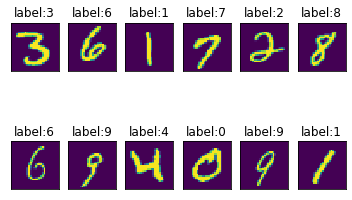

In [16]:
def preview(data, result):
    fig = plt.figure()
    for i in range(12):
        plt.subplot(2,6,i+1)
        plt.imshow(data[i], interpolation='none')
        plt.title("label:{}".format(result[i]))
        plt.xticks([])
        plt.yticks([])
preview(x_train[12:],y_train[12:])

In [32]:
# apparently you can just use keras.flatten to do this in the model below
# # reshape into 1 x 784 instead of 28 x 28 because of formatting limits
# x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
# x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# # Normalize Our Data
# x_train = x_train / 255
# x_test = x_test / 255

# # Now the data should be in a format you're more familiar with
# x_train.shape

In [17]:
def build_model(var_activation='relu', var_optimizer='adam'):
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 1])) # flatten image here instead of outside, better encapsulation
    model.add(Dense(64,activation=var_activation))
    model.add(Dense(32,activation=var_activation))
    model.add(Dense(16,activation=var_activation))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy",
                optimizer=var_optimizer,
                metrics=["accuracy"])
    return model

In [18]:
model_default = build_model()
model_default.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [19]:
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

{'var_activation': ['tanh', 'relu', 'selu'], 'var_optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64]}


In [ ]:
rscv = RandomizedSearchCV(model, param_distribution=params, cv=3,n_iter=10)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [33]:
# import numpy as np

# y_temp = np.zeros(y_train.shape)
# y_temp[np.where(y_train == 0.0)[0]] = 1
# y_train = y_temp

# y_temp = np.zeros(y_test.shape)
# y_temp[np.where(y_test == 0.0)[0]] = 1
# y_test = y_temp

In [40]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

### Estimating Your `net

In [ ]:
# mnist = NeuralNetwork()

# mnist.train(x_train, y_train)

# for i in range(10000):
#     if ((i+1) % 1000 == 0):
#         print('Input: \n', x_train)
#         print('Output: \n', y_train)
#         print('Predicted Output \n', str(nn.feed_forward(features)))
#         print("Loss: \n", str(np.mean(np.square(target - nn.feed_forward(features)))))
#     mnist.train(x_train, y_train)


## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?